<a href="https://colab.research.google.com/github/axell2017/noobstuff/blob/master/SimpleNNnumber_sample_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modules

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import tqdm
import tensorflow as tf


Using TensorFlow backend.


# PREPROCESS TEST DATA

In [2]:
train_path = 'C:/Users/Axell2017/Downloads/Code/PetImages'
categories = ['Dog', 'Cat']

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)




#test_labels = np.array(test_labels)
#test_samples = np.array(test_samples)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(x_train[0])
plt.imshow(x_train[0])
plt.show()

In [0]:
print(y_train[3])

1


# MODEL

In [0]:
model = Sequential()
model.add(Flatten()) # converts our 3D feature maps into 1D feature vectors
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

validation_split = 0.1 = uses training data and splits 10% of it as testing/validation set as it trains on epochs.



In [0]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 139us/step - loss: 0.2640 - acc: 0.9224 - val_loss: 0.1388 - val_acc: 0.9568
Epoch 2/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.1067 - acc: 0.9673 - val_loss: 0.1004 - val_acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 7s 123us/step - loss: 0.0711 - acc: 0.9779 - val_loss: 0.0947 - val_acc: 0.9700
Epoch 4/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0539 - acc: 0.9826 - val_loss: 0.0861 - val_acc: 0.9751
Epoch 5/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.0404 - acc: 0.9864 - val_loss: 0.0853 - val_acc: 0.9751


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [7]:
val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

10000/10000 [==============================] - 0s 28us/step
0.08525860200156457
0.9751


# PREDICTION

In [0]:
predictions = model.predict(x_test)

In [0]:
for i in predictions:
  print(i)

Rounded predictions will take the raw prediciton data and classify it based on labels.

In [10]:
print(np.argmax(predictions[666]))

7


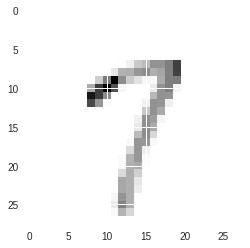

In [11]:
plt.imshow(x_test[666])
plt.show()

# SAVE AND LOAD MODEL

In [0]:
model.save("enter name here.h5")

Function will save:


*   The architecture of the model, allowing to re-create the model.
*   The weights of the model.
*   The training configuration (loss, optimizer).
*  The state of the optimizer, allowing to resume training exactly where you left off.




In [0]:
from keras.models import load_model
new_model = load_model("saved name file.h5")

In [0]:
new_model.summary()  #should have exact same summary as saved model